# Lab 5 - General Linear Models: Logistic regression

In [3]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import csv

#### Read data from csv file

In [47]:
data = pd.read_csv('logistic_reg_data.csv')
data.describe()
data = data.drop('Unnamed: 0', 1)

C:\Users\Maciej\AppData\Local\Temp/ipykernel_11548/2633173292.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Unnamed: 0', 1)


In [48]:
data

,x1,x2,x3,x4,x5,y
0,-0.318816,0.101644,-3.240568e-02,1.033146e-02,-3.293836e-03,1
1,0.823793,0.678635,5.590543e-01,4.605449e-01,3.793936e-01,1
2,-0.948920,0.900449,-8.544537e-01,8.108081e-01,-7.693919e-01,0
3,-0.601142,0.361371,-2.172353e-01,1.305892e-01,-7.850259e-02,1
4,-0.008257,0.000068,-5.629723e-07,4.648534e-09,-3.838354e-11,1
...,...,...,...,...,...,...
495,-0.930452,0.865742,-8.055313e-01,7.495084e-01,-6.973819e-01,0
496,-0.675202,0.455898,-3.078229e-01,2.078426e-01,-1.403357e-01,0
497,0.991789,0.983646,9.755700e-01,9.675600e-01,9.596158e-01,1
498,0.714850,0.511011,3.652959e-01,2.611318e-01,1.866701e-01,1


In [49]:
data.describe()

,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


### Prior selection


In [9]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [50]:
R=1000
data_ppc= dict(N = data.shape[0],
                M = 5,
                X = data.iloc[:,0:5].values,
                sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                        iter_sampling=R, iter_warmup=0, 
                        chains=1, 
                        refresh=R,
                        fixed_param=True,
                        seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [64]:
(data.iloc[:,0:5].values * np.ones([500,1])).shape

(500, 5)

In [62]:
np.ones([500,1]).shape

(500, 1)

In [54]:
df1 = sim_ppc1.draws_pd()
df1

,lp__,accept_stat__,prob_ppc[1],prob_ppc[2],prob_ppc[3],prob_ppc[4],prob_ppc[5],prob_ppc[6],prob_ppc[7],prob_ppc[8],...,prob_ppc[497],prob_ppc[498],prob_ppc[499],prob_ppc[500],beta[1],beta[2],beta[3],beta[4],beta[5],alpha
0,0.0,0.0,0.007309,1.000000,9.982680e-01,0.000921,0.903657,0.999999,0.004552,0.001257,...,0.002130,0.999996,1.000000,8.954250e-01,27.081700,7.771810,-12.72270,1.27591,-13.89420,2.461620
1,0.0,0.0,0.117494,1.000000,5.992570e-01,0.250869,0.421238,0.999880,0.118463,0.142245,...,0.340473,1.000000,1.000000,5.876030e-01,11.987300,22.653300,9.70844,5.55378,5.98941,-0.220250
2,0.0,0.0,0.000039,0.999584,2.067610e-02,0.000006,0.002458,0.271395,0.000028,0.000010,...,0.000009,1.000000,0.989870,1.420800e-03,13.120500,-3.421260,-3.11130,16.60650,-1.88132,-5.897550
3,0.0,0.0,0.033726,0.998428,2.272810e-04,0.011418,0.083315,0.264589,0.030763,0.021761,...,0.007375,1.000000,0.954659,6.828700e-04,2.843390,-0.719950,1.15899,6.39209,8.91681,-2.374610
4,0.0,0.0,0.026316,0.000038,5.096640e-15,0.000038,0.191734,0.022768,0.017591,0.002782,...,0.000002,0.000013,0.000185,1.366720e-12,0.966513,-17.072100,0.98292,-6.49448,11.80830,-1.429630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.112019,0.996859,2.673980e-02,0.056031,0.511710,0.951343,0.099370,0.071075,...,0.053762,0.999847,0.991304,3.731340e-02,7.998350,0.786523,-9.13510,1.56640,7.67012,0.112832
996,0.0,0.0,0.550595,0.295365,4.432160e-04,0.178437,0.529444,0.236914,0.530867,0.420894,...,0.083111,0.673287,0.207836,1.843170e-03,-2.438420,-4.535120,6.52074,0.27651,0.91221,0.098090
997,0.0,0.0,0.981980,0.002823,1.000000e+00,0.999273,0.853654,0.185240,0.985892,0.994782,...,0.999791,0.000672,0.008645,9.999990e-01,-6.799870,-1.190060,-6.19289,4.38884,0.72679,1.707480
998,0.0,0.0,0.999246,1.000000,1.305100e-08,0.490329,0.999964,0.999995,0.998768,0.989483,...,0.049264,1.000000,1.000000,5.679310e-07,5.223800,-7.571770,19.73160,-3.85811,-4.31394,10.289300


#### Task 1.

1. Plot histograms of beta for prior model
2. Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.
3. Consider which result should be taken into account when selecting prior.

In [52]:
beta1 = df1.loc[:, 'beta[1]']
beta2 = df1.loc[:, 'beta[2]']
beta3 = df1.loc[:, 'beta[3]']
beta4 = df1.loc[:, 'beta[4]']
beta5 = df1.loc[:, 'beta[5]']

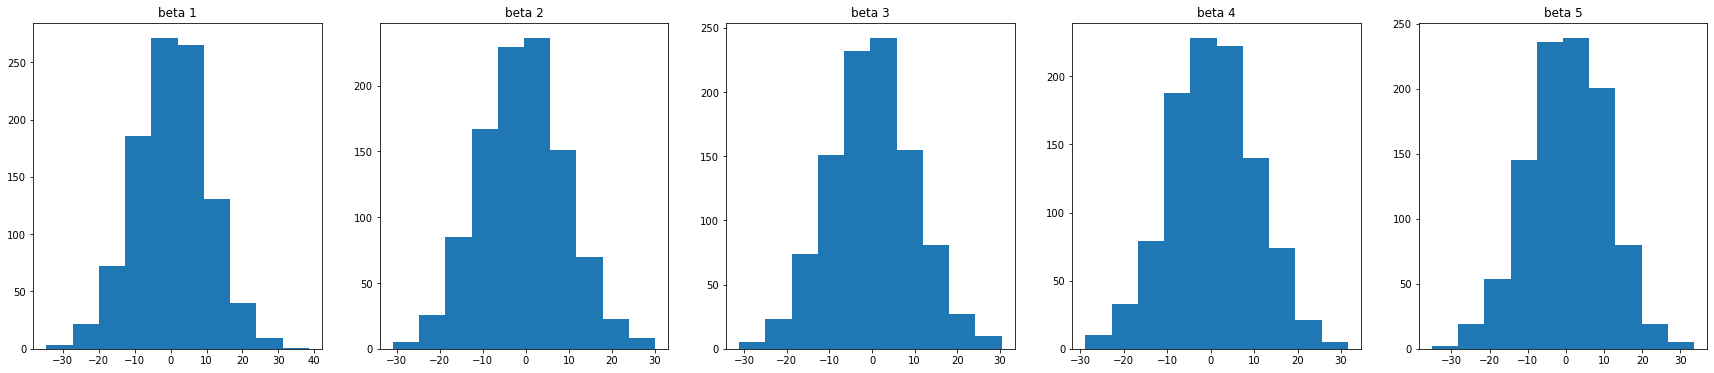

In [53]:
fig, axis = plt.subplots(1, 5, figsize = (30, 6))
axis[0].hist(beta1)
axis[0].set_title('beta 1')
axis[1].hist(beta2)
axis[1].set_title('beta 2')
axis[2].hist(beta3)
axis[2].set_title('beta 3')
axis[3].hist(beta4)
axis[3].set_title('beta 4')
axis[4].hist(beta5)
axis[4
].set_title('beta 5')
plt.show()

In [66]:
def plot_betas(sigma):
    R=1000
    data_ppc= dict(N = data.shape[0],
                    M = 5,
                    X = data.iloc[:,0:5].values,
                    sigma=sigma)
    sim_ppc1=model_ppc1.sample(data=data_ppc, 
                            iter_sampling=R, iter_warmup=0, 
                            chains=1, 
                            refresh=R,
                            fixed_param=True,
                            seed=29042020)
    df1 = sim_ppc1.draws_pd()
    beta1 = df1.loc[:, 'beta[1]']
    beta2 = df1.loc[:, 'beta[2]']
    beta3 = df1.loc[:, 'beta[3]']
    beta4 = df1.loc[:, 'beta[4]']
    beta5 = df1.loc[:, 'beta[5]']
    fig, axis = plt.subplots(1, 5, figsize = (30, 6))
    axis[0].hist(beta1)
    axis[0].set_title('beta 1')
    axis[1].hist(beta2)
    axis[1].set_title('beta 2')
    axis[2].hist(beta3)
    axis[2].set_title('beta 3')
    axis[3].hist(beta4)
    axis[3].set_title('beta 4')
    axis[4].hist(beta5)
    axis[4
    ].set_title('beta 5')
    plt.show()

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


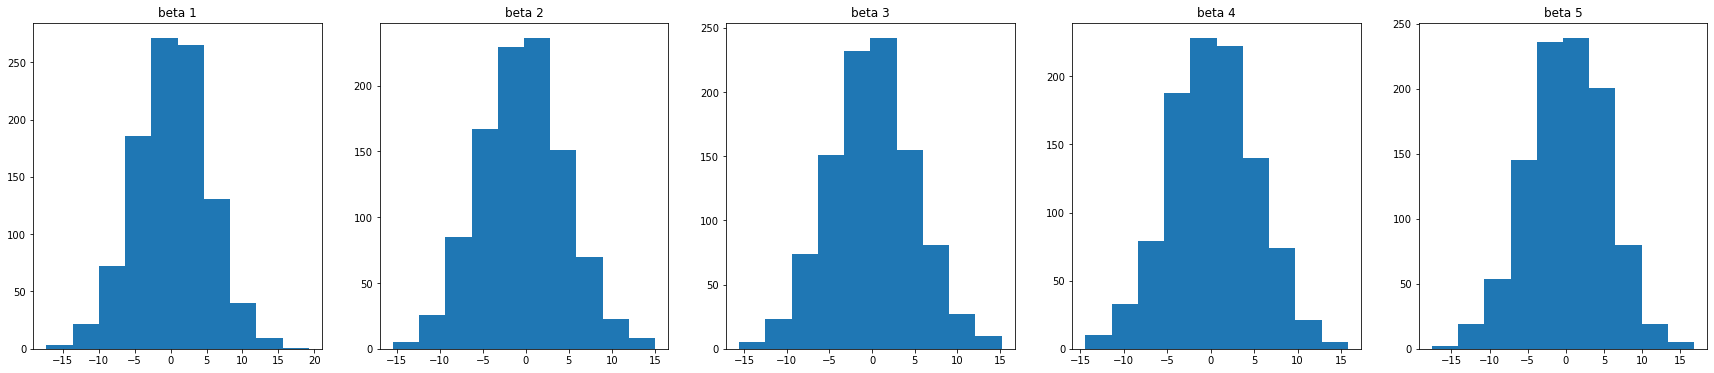

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


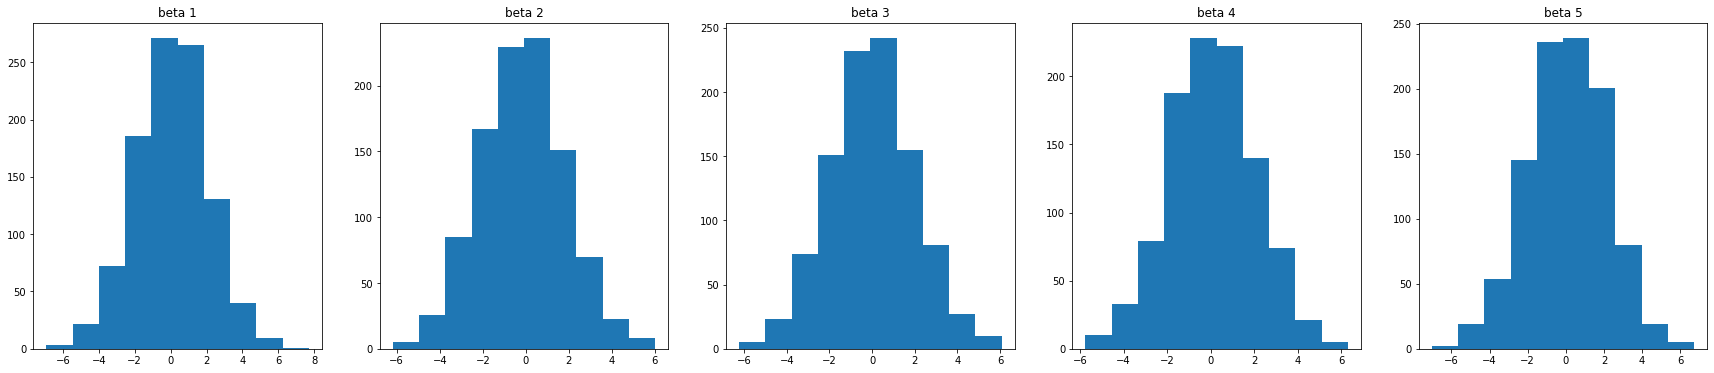

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


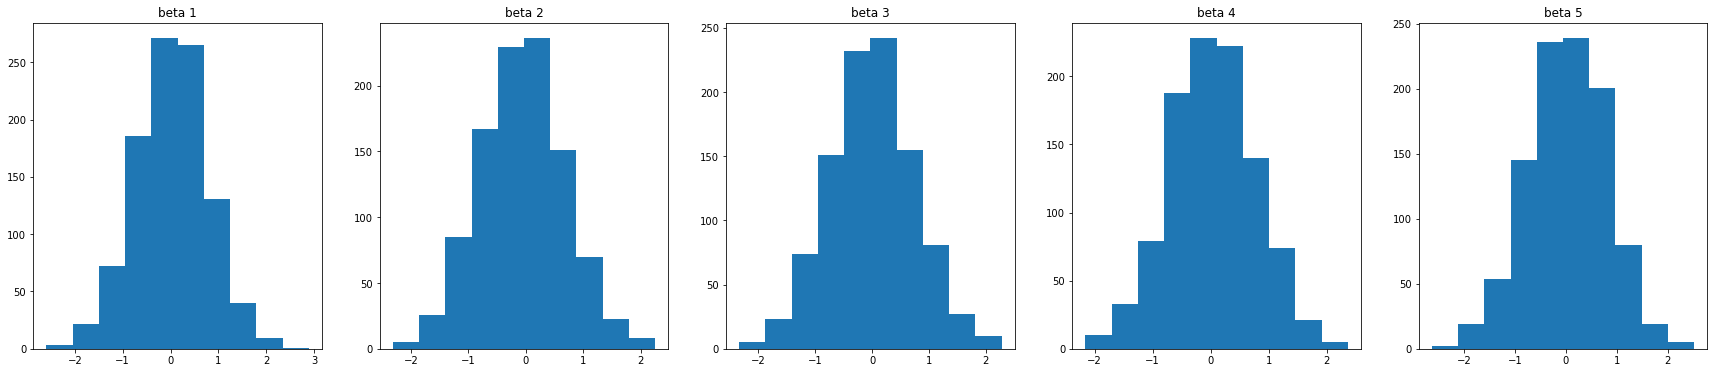

In [68]:
plot_betas(5)
plot_betas(2)
plot_betas(0.75)

### Posterior inference

In [15]:
model = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [69]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██


INFO:cmdstanpy:CmdStan done processing.


In [89]:
df2 = fit.draws_pd()
df2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta[1],beta[2],beta[3],...,prob_ppc[491],prob_ppc[492],prob_ppc[493],prob_ppc[494],prob_ppc[495],prob_ppc[496],prob_ppc[497],prob_ppc[498],prob_ppc[499],prob_ppc[500]
0,-342.250,0.796669,0.296901,4.0,15.0,0.0,345.743,1.007670,-1.585810,-1.194030,...,0.654696,0.602874,0.654299,0.363040,0.552465,0.362848,0.390248,0.354175,0.533795,0.361721
1,-338.533,0.945683,0.296901,4.0,15.0,0.0,345.068,0.406974,-0.205364,0.331719,...,0.571932,0.540159,0.572892,0.316241,0.521381,0.317350,0.411166,0.264404,0.522901,0.331172
2,-345.111,0.925225,0.296901,3.0,7.0,0.0,346.556,0.375906,0.587419,1.360350,...,0.608511,0.563006,0.611465,0.195641,0.550932,0.198276,0.404373,0.402420,0.651624,0.230959
3,-339.396,0.988671,0.296901,4.0,15.0,0.0,349.728,0.563731,-0.504597,0.390702,...,0.635880,0.596885,0.636829,0.340776,0.569618,0.341433,0.425612,0.285597,0.579399,0.350564
4,-339.595,0.920632,0.296901,4.0,15.0,0.0,342.398,0.204763,-0.188541,0.029963,...,0.524070,0.510171,0.524243,0.306948,0.499929,0.308798,0.422685,0.361363,0.484648,0.330471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-339.632,0.882384,0.271850,4.0,15.0,0.0,340.217,0.651699,0.064428,-0.168624,...,0.622996,0.569430,0.624923,0.394241,0.546166,0.395095,0.461337,0.341199,0.597600,0.405518
3996,-338.074,0.992227,0.271850,3.0,15.0,0.0,340.320,0.888812,-0.447317,-0.343722,...,0.603502,0.537787,0.605235,0.223964,0.500227,0.225609,0.348061,0.348476,0.563970,0.245489
3997,-337.803,0.956292,0.271850,3.0,15.0,0.0,340.272,0.456380,-0.210547,0.495122,...,0.582681,0.546108,0.583933,0.266749,0.524972,0.268307,0.392305,0.308822,0.550973,0.287451
3998,-341.711,0.628503,0.271850,2.0,3.0,0.0,342.650,0.636192,-0.426615,0.463668,...,0.584485,0.536534,0.585832,0.179004,0.506165,0.180710,0.327952,0.231577,0.527334,0.202004


In [70]:
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])

In [71]:
estimate_ppc_df

,lo,med,hi
0,0.472891,0.495108,0.516398
1,0.479092,0.510563,0.542937
2,0.252350,0.295034,0.341471
3,0.388852,0.412652,0.437772
4,0.537425,0.558757,0.579647
...,...,...,...
495,0.261324,0.300712,0.343919
496,0.363227,0.388069,0.413418
497,0.319872,0.376336,0.433395
498,0.532645,0.560673,0.588944


In [113]:
estimate_ppc_df.loc[:, 'lo']

0      0.472891
1      0.479092
2      0.252350
3      0.388852
4      0.537425
         ...   
495    0.261324
496    0.363227
497    0.319872
498    0.532645
499    0.278853
Name: lo, Length: 500, dtype: float64

#### Task 2.

1. Edit stan model and create models with different priors. Use original setting and some priors from task 1.
2. Fit the model
3. Plot the probability of individual outcome:
- plot generated paramether theta (prob_pcc): mean with its error bars (plt.errorbar)
- to plot its error bars take into consider its 25th, 50th and 75th percentile
- also mark the real value of y, by different colored dots (for mean values)
    
4. Consider if the probability was well captured by each setting

Text(0.5, 1.0, 'hi')

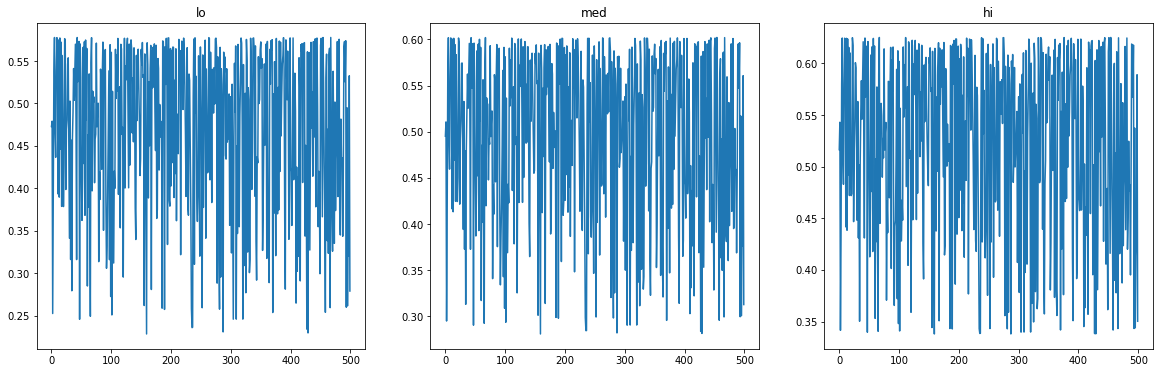

In [86]:
fig, axis = plt.subplots(1, 3, figsize = (20, 6))
axis[0].plot(estimate_ppc_df.loc[:, 'lo'])
axis[0].set_title('lo')
axis[1].plot(estimate_ppc_df.loc[:, 'med'])
axis[1].set_title('med')
axis[2].plot(estimate_ppc_df.loc[:, 'hi'])
axis[2].set_title('hi')

C:\Users\Maciej\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


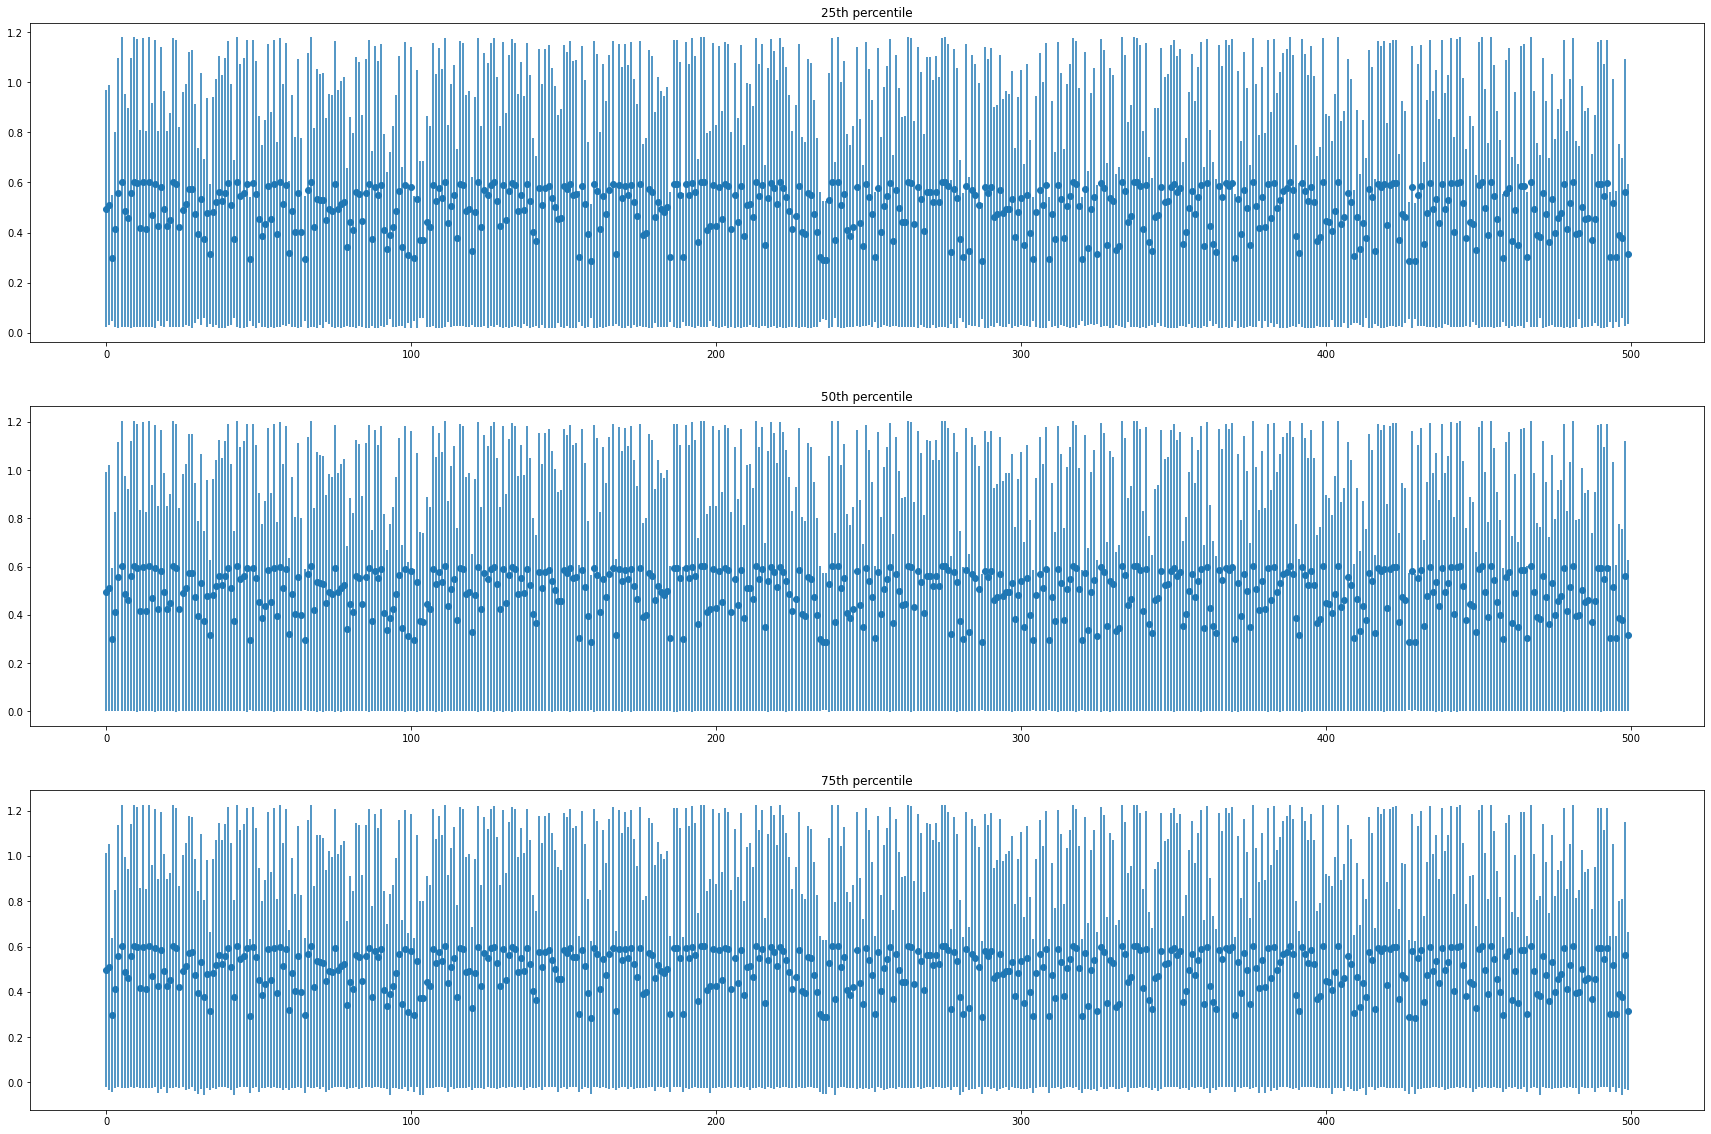

In [117]:
x = np.linspace(0, 499, 500)
er_data = df2.iloc[:, 513:1013]

mean = np.mean(er_data)
fig, axis = plt.subplots(3, 1, figsize = [30, 20])
axis[0].errorbar(x, mean, yerr = estimate_ppc_df.loc[:, 'lo'], fmt = 'o')
axis[0].set_title('25th percentile')
axis[1].errorbar(x, mean, yerr = estimate_ppc_df.loc[:, 'med'], fmt = 'o')
axis[1].set_title('50th percentile')
axis[2].errorbar(x, mean, yerr = estimate_ppc_df.loc[:, 'hi'], fmt = 'o')
axis[2].set_title('75th percentile')
plt.show()